In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#Solving with Runge Kutta Order-4
# Size of K1 is 3*100, i.e 100 iterations of each Random Vector X,Y,Z
# https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods

k1=np.zeros((3,100))
k2=np.zeros((3,100))
k3=np.zeros((3,100))
k4=np.zeros((3,100))

# Finding the solution of x,y,z from T_initial =0s to T_Final=100s

x=np.zeros((100))
y=np.zeros((100))
z=np.zeros((100))

#Consider 6 different time steps

#Consolidating all x values for each time step and each intial condition

X=np.zeros((6,100))
Y=np.zeros((6,100))
Z=np.zeros((6,100))

In [3]:
##Initial Values as defined in the problem statement

x[0]=1
y[0]=1
z[0]=1

In [7]:
#Function which calculates the derivative of X,Y,Z at different time instances when given as input

def model(a,b,c):
  x[0]=1
  y[0]=1
  z[0]=1
  dx_dt=(10*(b-a))
  dy_dt=(a*(28-c)-b)
  dz_dt=((a*b-((8/3)*c)))
  return dx_dt,dy_dt,dz_dt

In [8]:
#Function which calculates the value of K1, K2, K3 and K4 after utilising the derivatives values as calculated in Model Function previously

def imp(i,h):
 k1[0][i],k1[1][i],k1[2][i]=model(x[i],y[i],z[i])
 k2[0][i],k2[1][i],k2[2][i]=model(x[i]+(k1[0][i]*h/2),y[i]+(k1[1][i]*h/2),z[i]+(k1[2][i]*h/2))
 k3[0][i],k3[1][i],k3[2][i]=model(x[i]+(k2[0][i]*h/2),y[i]+(k2[1][i]*h/2),z[i]+(k2[2][i]*h/2))
 k4[0][i],k4[1][i],k4[2][i]=model(x[i]+(k3[0][i]*h),y[i]+(k3[1][i]*h),z[i]+(k3[2][i]*h))
 x[i+1]=x[i]+((k1[0][i]+ 2*k2[0][i]+2*k3[0][i]+k4[0][i])/6)*h
 y[i+1]=y[i]+((k1[1][i]+ 2*k2[1][i]+2*k3[1][i]+k4[1][i])/6)*h
 z[i+1]=z[i]+((k1[2][i]+ 2*k2[2][i]+2*k3[2][i]+k4[2][i])/6)*h


In [9]:
h=np.array([0.00001,0.0001,0.0005,0.001,0.01,1])
for p in range(0,6):
  for i in range(0,99):
   imp(i,h[p])
   X[p]=x
   Y[p]=y
   Z[p]=z
  
  #Warning coming because of timestep h=1, which is because value is increasing fastly and reaching towards infinite end. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Plotting solution of differential equation at various time steps




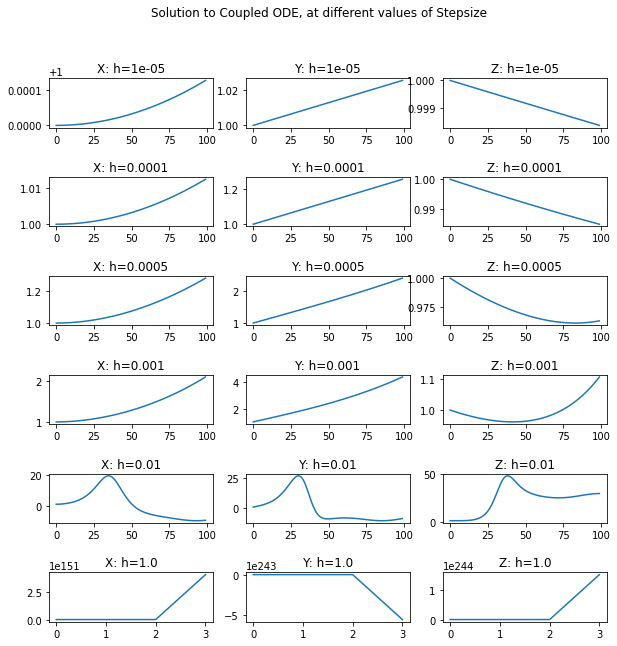

In [10]:
#PLotting the results 

fig, axs = plt.subplots(6,3, figsize=(10,10))
fig.suptitle('Solution to Coupled ODE, at different values of Stepsize')
for j in range(0,6):
  axs[j,0].plot(X[j])
  axs[j,0].set_title(f'X: h={h[j]}')
  axs[j,1].plot(Y[j])
  axs[j,1].set_title(f'Y: h={h[j]}')
  axs[j,2].plot(Z[j])
  axs[j,2].set_title(f'Z: h={h[j]}')

plt.subplots_adjust(hspace=1)
